Implementing Sorting Algorithms

In [1]:
import random
import time
import sys

# Increase recursion limit for quicksort on large datasets
sys.setrecursionlimit(1500)


def quick_sort(arr):
    """Sorts an array using the Quick Sort algorithm.

    Args:
        arr (list): List of integers to be sorted.

    Returns:
        list: A sorted list of integers.
    """
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)


def merge_sort(arr):
    """Sorts an array using the Merge Sort algorithm.

    Args:
        arr (list): List of integers to be sorted.

    Returns:
        list: A sorted list of integers.
    """
     
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = merge_sort(arr[:mid])
    right = merge_sort(arr[mid:])
    return merge(left, right)


def merge(left, right):
    """Helper function to merge two sorted lists.

    Args:
        left (list): Left half of the list.
        right (list): Right half of the list.

    Returns:
        list: Merged and sorted list.
    """

    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] <= right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result


def insertion_sort(arr):
    """Sorts an array using the Insertion Sort algorithm.

    Args:
        arr (list): List of integers to be sorted.

    Returns:
        list: Sorted list of integers.
    """

    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr


def bubble_sort(arr):
    """Sorts an array using the Bubble Sort algorithm.

    Args:
        arr (list): List of integers to be sorted.

    Returns:
        list: Sorted list of integers.
    """

    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            break
    return arr


Generating Datasets

In [2]:

def generate_random_array(size, repeated=False):
    """Generates an array of random integers.

    Args:
        size (int): Number of elements in the array.
        repeated (bool): Boolean flag to include repeated values.

    Returns:
        list: List of random integers.
    """
    if repeated:
        # Random array with repeated values
        return [random.randint(0, size // 10) for _ in range(size)]
    else:
        # Fully random array
        return [random.randint(0, size) for _ in range(size)]


def generate_partially_sorted_array(size, sorted_percentage):
    """Generates a partially sorted array.

    Args:
        size (int): Number of elements in the array.
        sorted_percentage (float): Fraction of elements that are pre-sorted.

    Returns:
        list: Partially sorted list of integers.
    """
    sorted_part_size = int(size * sorted_percentage)
    sorted_part = sorted([random.randint(0, size) for _ in range(sorted_part_size)])
    unsorted_part = [random.randint(0, size) for _ in range(size - sorted_part_size)]
    return sorted_part + unsorted_part


def test_sorting_algorithm(algorithm, arr):
    """Tests a sorting algorithm by measuring its execution time.

    Args:
        algorithm (function): The sorting algorithm function to test.
        arr (list): The array to be sorted.

    Returns:
        float: Execution time in seconds.
    """
    start_time = time.time()
    sorted_arr = algorithm(arr[:])  # [:] ensures that the original array is not modified
    end_time = time.time()
    return end_time - start_time


Measuring Execution Times

In [3]:

def run_tests():
    """Runs tests for each sorting algorithm on different dataset conditions.

    Returns:
        tuple: Contains the list of sizes and a dictionary with timing data.
    """
    sizes = [1000, 5000, 10000]  # Data sizes for testing
    algorithms = [quick_sort, merge_sort, insertion_sort, bubble_sort]
    algorithm_names = ["Quick Sort", "Merge Sort", "Insertion Sort", "Bubble Sort"]

    results = {name: {'Random': [], '50% Sorted': [], '25% Repeated': []} for name in algorithm_names}
    
    for size in sizes:
        for i, algorithm in enumerate(algorithms):
            random_data = generate_random_array(size)
            partially_sorted_data = generate_partially_sorted_array(size, 0.5)
            repeated_data = generate_random_array(size, repeated=True)

            random_time = test_sorting_algorithm(algorithm, random_data)
            partial_time = test_sorting_algorithm(algorithm, partially_sorted_data)
            repeated_time = test_sorting_algorithm(algorithm, repeated_data)

            results[algorithm_names[i]]['Random'].append(random_time)
            results[algorithm_names[i]]['50% Sorted'].append(partial_time)
            results[algorithm_names[i]]['25% Repeated'].append(repeated_time)

    return sizes, results


In [4]:
# Run the tests and get the results
sizes, timing_data = run_tests()

Results

In [5]:
import pandas as pd


def display_results_table(sizes, timing_data):
    """Creates a table displaying timing data for sorting algorithms.

    Args:
        sizes (list): List of data sizes tested.
        timing_data (dict): Dictionary containing execution times for each algorithm under different conditions.

    Returns:
        DataFrame: DataFrame with columns for data size, algorithm, and timing under different conditions.
    """
    data = []
    for size in sizes:
        for algorithm in timing_data.keys():
            data.append({
                'Data Size': size,
                'Algorithm': algorithm,
                'Random Time (s)': timing_data[algorithm]['Random'][sizes.index(size)],
                '50% Sorted Time (s)': timing_data[algorithm]['50% Sorted'][sizes.index(size)],
                '25% Repeated Time (s)': timing_data[algorithm]['25% Repeated'][sizes.index(size)]
            })
    
    df = pd.DataFrame(data)
    return df


# Display results in a table
results_table = display_results_table(sizes, timing_data)
print(results_table)

    Data Size       Algorithm  Random Time (s)  50% Sorted Time (s)  \
0        1000      Quick Sort         0.001341             0.000830   
1        1000      Merge Sort         0.001555             0.001198   
2        1000  Insertion Sort         0.009929             0.006151   
3        1000     Bubble Sort         0.020413             0.018431   
4        5000      Quick Sort         0.004185             0.012156   
5        5000      Merge Sort         0.004991             0.004313   
6        5000  Insertion Sort         0.232472             0.193037   
7        5000     Bubble Sort         0.623317             0.506538   
8       10000      Quick Sort         0.008982             0.060974   
9       10000      Merge Sort         0.010895             0.008792   
10      10000  Insertion Sort         0.911927             0.674515   
11      10000     Bubble Sort         2.249345             2.104953   

    25% Repeated Time (s)  
0                0.002676  
1                0.0

Plotting Results

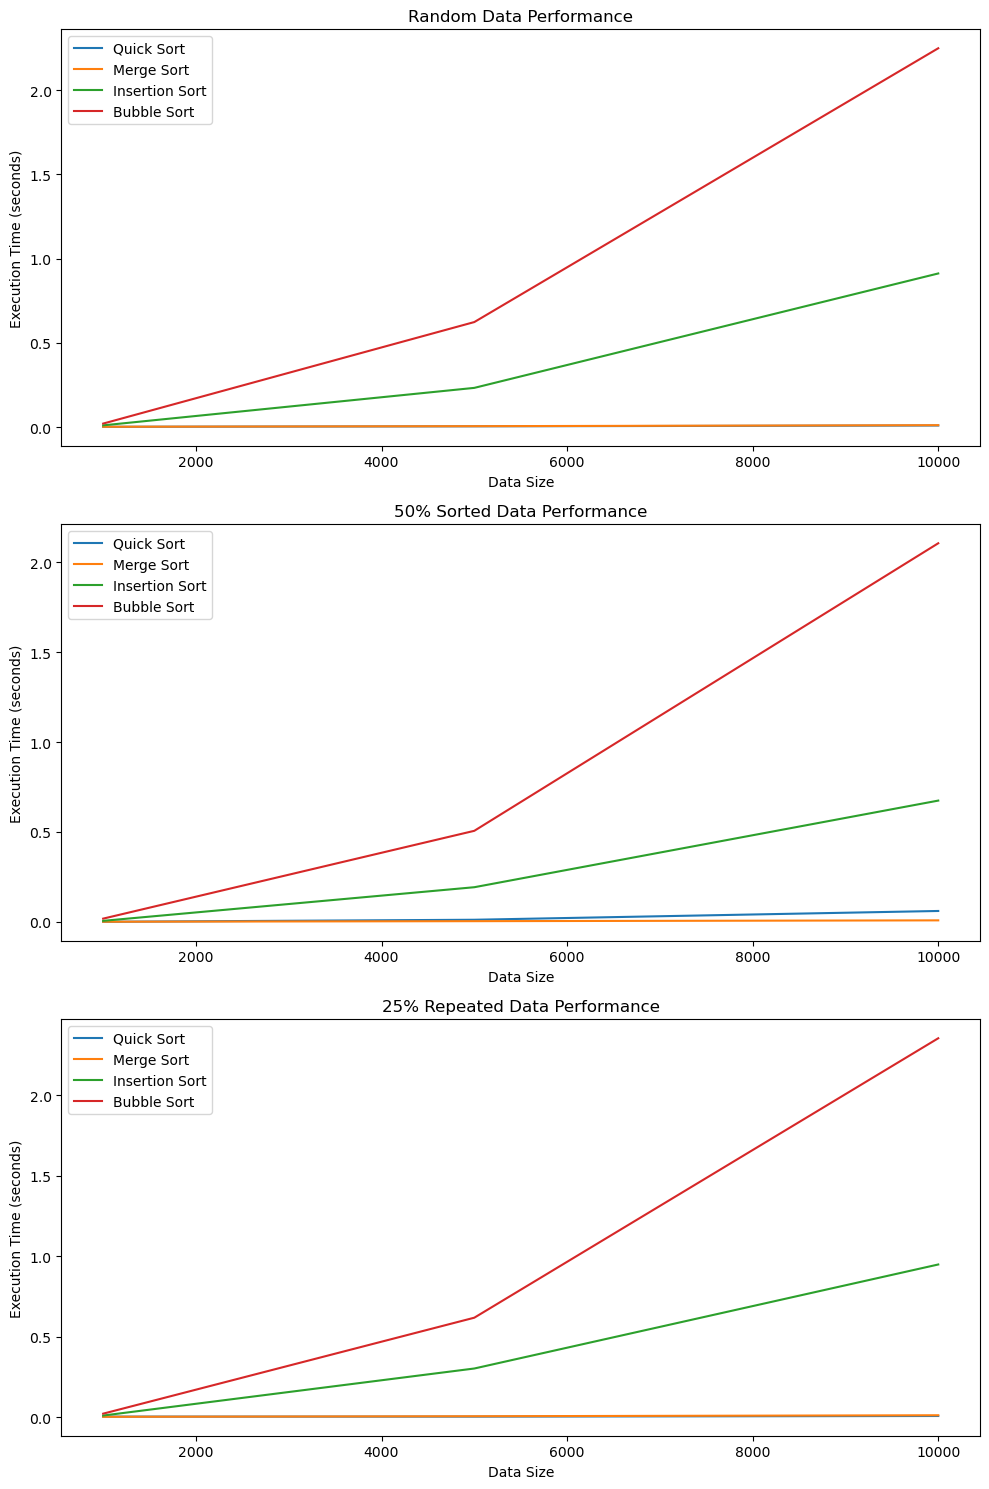

In [6]:
import matplotlib.pyplot as plt

def plot_results():
    """Plots the performance of sorting algorithms under different data conditions.

    Generates a plot for each condition ('Random', '50% Sorted', '25% Repeated') showing
    execution time for each sorting algorithm across various data sizes.
    """
    fig, ax = plt.subplots(3, 1, figsize=(10, 15))
    sort_conditions = ['Random', '50% Sorted', '25% Repeated']

    for idx, condition in enumerate(sort_conditions):
        ax[idx].set_title(f'{condition} Data Performance')
        ax[idx].set_xlabel('Data Size')
        ax[idx].set_ylabel('Execution Time (seconds)')
        
        for algorithm, times in timing_data.items():
            ax[idx].plot(sizes, times[condition], label=algorithm)
        
        ax[idx].legend()

    plt.tight_layout()
    plt.show()

# Plot the results
plot_results()
